## Time Series Analysis in Python | Time Series Forecasting

In [7]:
# Import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 10, 6

In [2]:
# Import data
dataset = pd.read_excel("Sea level data/Mumbai_India.xlsx", 
                               header=None, 
                               index_col=0, 
                               parse_dates=True,
                              names= ["Time", "Sea Level"])

In [3]:
dataset.head()

,Sea Level
Time,
1878.0416,6892
1878.1250,6974
1878.2084,6974
1878.2916,6998
1878.3750,7020


In [4]:
# change the unit of sea level

dataset["Sea Level (mm/year)"] = dataset["Sea Level"] * 12
dataset.head()

,Sea Level,Sea Level (mm/year)
Time,,
1878.0416,6892,82704
1878.1250,6974,83688
1878.2084,6974,83688
1878.2916,6998,83976
1878.3750,7020,84240


In [6]:
dataset["Sea Level (mm/year)"].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,.99])

count     1392.000000
mean     84159.500000
std        762.073348
min      81972.000000
10%      83150.400000
25%      83652.000000
50%      84192.000000
75%      84672.000000
90%      85116.000000
99%      85920.000000
max      86592.000000
Name: Sea Level (mm/year), dtype: float64

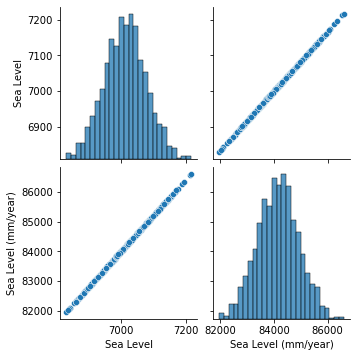

In [8]:
sns.pairplot(dataset)

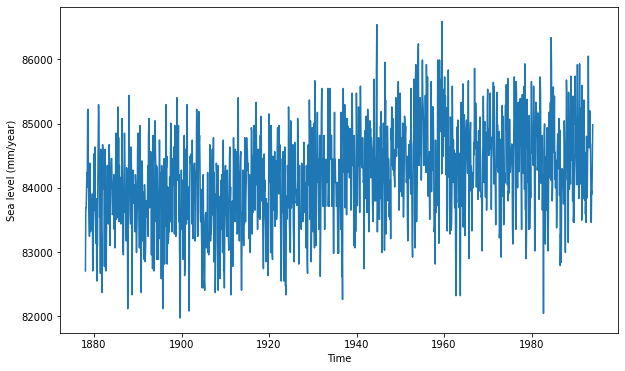

In [5]:
# Plot 
plt.xlabel("Time")
plt.ylabel("Sea level (mm/year)")
dataset['Sea Level (mm/year)'].plot()

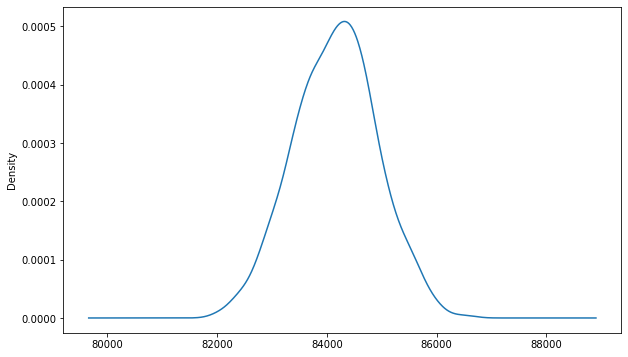

In [10]:
dataset["Sea Level (mm/year)"].plot.density()

In [12]:
dataset.corr()

,Sea Level,Sea Level (mm/year)
Sea Level,1.0,1.0
Sea Level (mm/year),1.0,1.0


In [17]:
# Determining rolling statistics
rol_mean = dataset.rolling(window=12).mean() # monthly basis window

rol_std = dataset.rolling(window=12).std()

print(rol_mean, rol_std)

           Sea Level (mm/month)  Sea Level (mm/year)
Time                                                
1878.0416                   NaN                  NaN
1878.1250                   NaN                  NaN
1878.2084                   NaN                  NaN
1878.2916                   NaN                  NaN
1878.3750                   NaN                  NaN
...                         ...                  ...
1993.6250           7049.833333              84598.0
1993.7084           7050.583333              84607.0
1993.7916           7046.083333              84553.0
1993.8750           7044.666667              84536.0
1993.9584           7037.250000              84447.0

[1392 rows x 2 columns]            Sea Level (mm/month)  Sea Level (mm/year)
Time                                                
1878.0416                   NaN                  NaN
1878.1250                   NaN                  NaN
1878.2084                   NaN                  NaN
1878.2916            

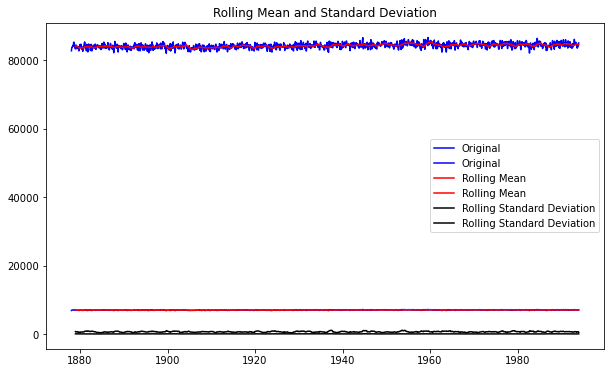

In [18]:
# Plot rolling statistics
orig = plt.plot(dataset, color='blue', label='Original')
mean = plt.plot(rol_mean, color='red', label='Rolling Mean')
std = plt.plot(rol_std, color='black', label='Rolling Standard Deviation')

plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviation")
plt.show()

In [19]:
# Trend, Seasonality and Residuals

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataset)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(dataset, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')

plt.tight_layout()

decomposeddataset

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None